In [3]:
#import needed libraries

dirPath = "/scratch/alim/overnight_validation/ANNE-PSG"
dirPath2 = "/scratch/alim/overnight_validation/ANNE-PSG"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mne



In [5]:
#extract ANNE directory to dictionary

def isAnnotatedEdf(name:str):

    return False

def isAlignmentPdf(name:str):
    return False

def isAlignMentCSV(name:str):

    return False

def ANNEtoDict(path:str):
    dict = {}
    files = [entry.name for entry in os.scandir(path)]

    for file_name in files:
        file_path = os.path.join(path,file_name)
        patient_name = ''



    

    
    return dict

ANNE_dict  = ANNEtoDict(dirPath)
print(ANNE_dict)

{}


In [4]:
#save metadata

metadataFileName = ANNE_dict['metadata']

metadataPath = os.path.join(dirPath,metadataFileName)

metadata_df = pd.read_csv(metadataPath)

metadata_df.head()

,file,age,sex,AHI,TST,n.channels,TRT,ECG,PPG,Both,align.pass
0,19-12-17-20_37_24.C823.L775.1,41.275953,Female,2.7,7.375000,32,9.717805,0.845287,0.991567,0.837912,True
1,19-12-18-20_07_58.C823.L775.2,61.410107,Male,0.0,0.766667,32,9.607577,0.917908,0.949802,0.875488,True
2,19-12-19-20_11_12.C823.L775.3,39.113050,Male,0.0,1.150000,32,9.209918,0.612795,0.904081,0.561457,True
3,20-01-14-20_23_27.C823.L775.4,58.231462,Female,3.3,6.033333,32,5.760911,0.368122,0.965276,0.355872,True
4,20-01-15-20_13_00.C823.L775.5,72.969313,Female,0.0,4.641667,32,8.327294,0.931560,0.948679,0.887680,True


Extracting EDF parameters from /scratch/alim/overnight_validation/ANNE-PSG231215/23-11-01-19_35_59.C3884.L3802.696/23-11-01-19_35_59.C3884.L3802.696-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3749999  =      0.000 ... 37499.990 secs...


/tmp/ipykernel_2970/3164231317.py:4: RuntimeWarning: Physical range is not defined in following channels:
PLM_events
  raw = mne.io.read_raw_edf(filePath, preload=True)


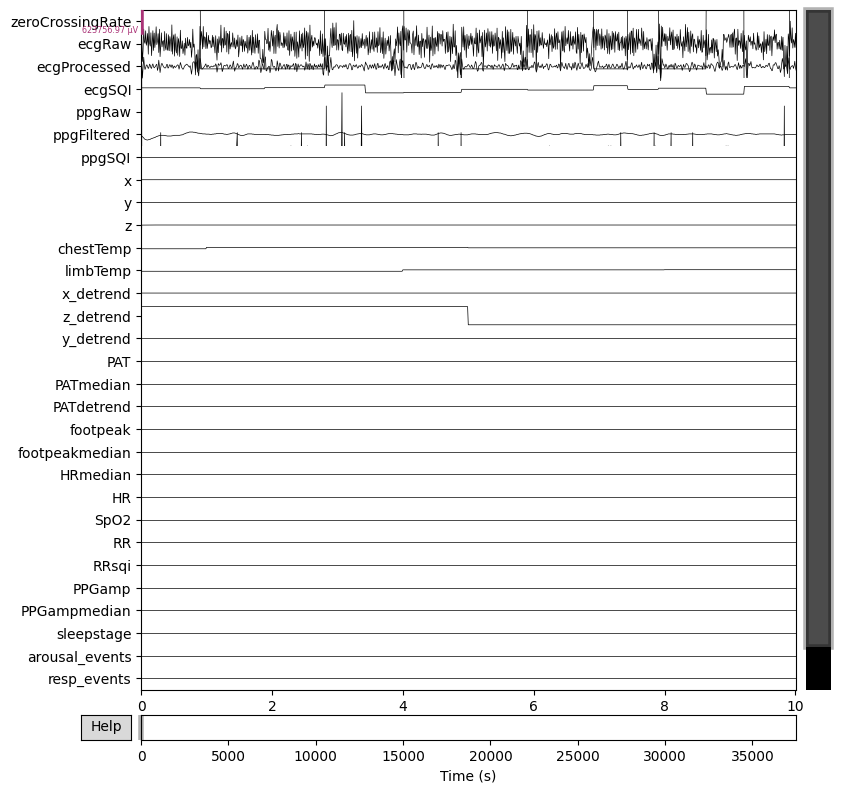

   zeroCrossingRate    ecgRaw  ecgProcessed    ecgSQI       ppgRaw  \
0          39.99939  0.000071      0.000032  0.575991    -0.101432   
1          39.99939  2.006053      0.067555  0.575991 -4222.677946   
2          39.99939  1.298418     -0.323012  0.575991 -4224.142974   
3          39.99939  1.596540     -0.022750  0.575991 -4227.439287   
4          39.99939  2.191258      0.254731  0.575991 -4226.340516   

   ppgFiltered    ppgSQI         x         y         z  ...   RR  RRsqi  \
0    -0.005416  0.626947 -0.000037  0.000079  0.000014  ... -2.0   -2.0   
1    -0.050601  0.626947  0.043412 -0.067824  1.007603  ... -2.0   -2.0   
2    -0.069965  0.626947  0.043457 -0.067741  1.007859  ... -2.0   -2.0   
3    -0.082875  0.626947  0.043503 -0.067700  1.008114  ... -2.0   -2.0   
4    -0.102240  0.626947  0.043548 -0.067617  1.008319  ... -2.0   -2.0   

     PPGamp  PPGampmedian  sleepstage  arousal_events  resp_events  \
0 -1.483864     -1.483864         0.0             0.0     

In [12]:
#test out one file to see what file looks like
filePath = f"{dirPath}23-11-01-19_35_59.C3884.L3802.696/23-11-01-19_35_59.C3884.L3802.696-features.edf"

raw = mne.io.read_raw_edf(filePath, preload=True)

# Plot the EEG data
raw.plot(n_channels=30, duration=10, scalings='auto', title='EEG Data')

# Show the plot
plt.show()

# Get the data and times
data, times = raw[:, :]

# Get the channel names
channel_names = raw.ch_names

# Create a DataFrame
df = pd.DataFrame(data.T, columns=channel_names)

# Add the 'Time' column to the DataFrame
df['Time'] = times

# Print the DataFrame
print(df.head())
